<h1>TP: Perceptron </h1>
<h3>DUBIN Baptiste</h3>

In [78]:
import csv
import numpy as np
import matplotlib.pyplot as plt

<h3> 1) Préparation des données</h3>

In [79]:
def get_data(name: str) -> list:
    """
    Récupère les données dans un fichier csv
    :param name: Nom du fichier
    :return: list
    """
    data = []
    with open(name, "r") as file:
        for i in csv.reader(file):
            data.append(i)
    return data


In [80]:
def tr_data(a: str) -> int:
    """
    Convertit les données textuelles en valeurs numériques :
    YES = 1 | NO = -1 | ? = 0
    Democrat = 1 | Republican = -1
    :param a: données textuelles
    :return: int
    """
    return -1 if a == 'n' or a == 'republican' else\
        (1 if a == 'y' or a == 'democrat'
         else(0 if a == '?' else a))


In [81]:
def create_corpus(data: list) -> tuple:
    """
    Création des corpus pour l'apprentissage et le test
    :param data: Base de données
    :return: list, list
    """
    corpus = []
    corpus_class = []

    for value in np.array(data):
        corpus_class += value[0],       # --> append
        corpus += value[1:],            # --> append

    return corpus, corpus_class


<h3> 2) Fonction classify</h3>

In [82]:
def classify(corpus: list, vecteur_poids: list, seuil: int) -> list:
    """
    Permet de donner l’étiquette d’une observation à partir d’un
    vecteur de poids sur l'ensemble d'un corpus
    :param corpus: corpus a déterminer
    :param vecteur_poids: vecteur permettant de prédire
    :param seuil: seuil
    :return: list
    """
    somme = 0
    tmp = []

    # On prend une ligne du corpus
    for ligne in corpus:
        # On prend une valeur dans la ligne
        for i in range(len(ligne)):
            # Sommes des valeurs d'une val avec le poids associé
            somme += ligne[i] * vecteur_poids[i]
        # Stockage dans un tableau
        tmp.append(somme + seuil)
        # Changement de ligne on remet à zéro
        somme = 0

    # Retourne la sortie modifier pour retourner l'étiquette
    return list(map(lambda x: 1 if x >= 0 else -1, tmp))

def classify_ligne(corpus: list, vecteur_poids: list) -> int:
    """
    Permet de donner l’étiquette d’une observation à partir d’un
    vecteur de poids sur l'ensemble une ligne du corpus
    :param corpus: corpus a déterminer
    :param vecteur_poids: vecteur permettant de prédire l'étiquette
    :return: int
    """
    return 1 if (np.dot(vecteur_poids, corpus) >= 0) else -1


<h3> 3) Fonction test </h3>

In [83]:
def test(corpus: list, corpus_class: list, vecteur_poids: list) -> float:
    """
    Renvoie le taux d’erreur d'une classification
    :param corpus: corpus contenant les caractéristique
    :param corpus_class: corpus contenant les valeurs à prédire
    :param vecteur_poids: vecteur poids à tester
    :return: float
    """
    tmp = classify(corpus, vecteur_poids, 1)
    somme_erreur = 0

    for i in range(len(corpus_class)):
        if tmp[i] != corpus_class[i]:
            somme_erreur += 1

    return somme_erreur / len(corpus_class)


<h3> 4) 7) Fonction train</h3>

In [84]:
def train(corpus: list, corpus_class: list, vecteur_poids: list, nb_iter: int, learning_rate: float, seuil_arret: float) -> tuple:
    """
    Implémente l'algorithme du perceptron
    :param corpus: caractéristique permettant de prédire la classe
    :param corpus_class: classe à prédire
    :param vecteur_poids: vecteur permettant de déterminer la frontière de décision
    :param nb_iter: nombre d'itérations
    :param learning_rate: learning rate
    :param seuil_arret: taux d'arret satisfaisant
    :return: list, list
    """
    v_poids = vecteur_poids
    best_poids = []
    erreur_tab = []
    flag = False

    for iteration in range(nb_iter):
        # Calcul taux erreur pour un vecteur poids
        erreur = test(corpus, corpus_class, v_poids)
        # Conserve chaque taux d'erreur
        erreur_tab.append(erreur * 100)
        # Conditions d'arret par seuil
        if (erreur * 100) < seuil_arret:
            flag = True
            best_poids = v_poids.copy()
            break
        # Parcours les ligne du corpus
        for ligne in range(len(corpus)):
            # Prédit une ligne
            classif = classify_ligne(corpus[ligne], v_poids)
            # Parcours des valeurs d'une ligne
            for valeur in range(len(corpus[ligne])):
                # Mise à jour du poids
                v_poids[valeur] += learning_rate * (corpus_class[ligne] - classif) * corpus[ligne][valeur]

        # Calcul le taux d'erreur intermédiaire
        tmp_erreur = test(corpus, corpus_class, v_poids)
        # Observe si taux après est meilleur
        if tmp_erreur < erreur:
            best_poids = v_poids.copy()

    print("[+] Arret par itération") if flag else print("[+] Arret par seuil")
    return erreur_tab, best_poids


<h3> 5) Fonction tracage de courbe</h3>

In [85]:
def trace(data: list, title: str, x: str, y: str) -> None:
    """
    Trace la courbe d’évolution du taux d’erreur en fonction
    de l’avancement de l’apprentissage
    :param data: courbe à afficher
    :param title: Titre
    :param x: xlabel
    :param y: ylabel
    :return: None
    """
    plt.plot(data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


<h4> 6) Sommes nous sûrs d’atteindre une erreur nulle sur le corpus d’apprentissage ?</h4>
<h6>Non, car la solutions n'est pas obligatoirement séparable de manière linéaire.</h6>

In [86]:
def main() -> None:
    # Récupération des données
    data = get_data("house-votes-84.data")

    # Passage des données en numérique
    for i in range(len(data)):
        data[i] = list(map(tr_data, data[i]))

    # Mélange des données
    np.random.seed(2)
    np.random.shuffle(data)

    # Création des corpus
    app_corpus, app_corpus_class = create_corpus(data[100:])
    test_corpus, test_corpus_class = create_corpus(data[:100])

    nb_iter = 50
    learning_rate = 0.1

    # Corpus d'apprentissage
    # vecteur_poids = np.zeros(np.shape(app_corpus[0])[0])
    vecteur_poids = np.random.uniform(0, 1, np.shape(app_corpus[0])[0])
    erreur, poids = train(app_corpus, app_corpus_class, vecteur_poids, nb_iter, learning_rate, 1.5)

    # Affichage de l'évolution du taux d'erreur
    trace(erreur, "Courbe de l\'évolution du taux d'erreur sur le corpus d'apprentissage", "Itération", "Taux")

    print("Vecteur poids :", poids)
    print("Taux d'erreur : ", min(erreur), "%")

    # Corpus de Test
    # vecteur_poids = np.zeros(np.shape(test_corpus[0])[0])
    vecteur_poids = np.random.uniform(0, 1, np.shape(app_corpus[0])[0])
    erreur, poids = train(test_corpus, test_corpus_class, vecteur_poids, nb_iter, learning_rate, 1.5)

    # Affichage de l'évolution du taux d'erreur
    trace(erreur, "Courbe de l\'évolution du taux d'erreur sur le corpus de test", "Itération", "Taux")

    print("Vecteur poids :", poids)
    print("Taux d'erreur : ", min(erreur), "%")


[+] Arret par seuil


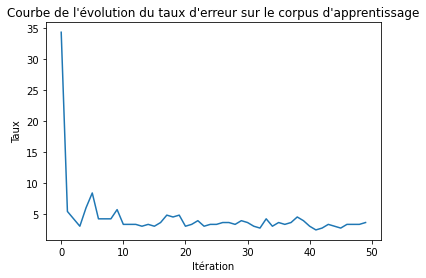

Vecteur poids : [ 1.16711313  2.06809934  2.30300677 -4.42199759 -2.26263171  2.15201071
 -0.30666617 -0.4658983   0.4434897  -0.55244912  0.54317072 -1.84313983
  1.55751823  1.40945037  1.05354827  0.85422669]
Taux d'erreur :  2.3880597014925375 %
[+] Arret par itération


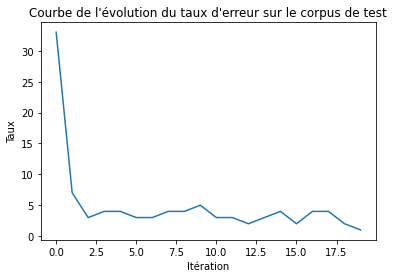

Vecteur poids : [-1.02931447 -0.05502004  0.40264905 -3.73709846  0.8979604   0.0967275
 -0.73033941  0.73515356  0.40609764 -0.93578765  2.01466826 -1.10866228
 -0.47647149  0.41159758 -0.11973171 -0.08289496]
Taux d'erreur :  1.0 %


In [87]:
main()